# **Assignment A-3 (PART - A)**


---





#**1) Load and Prepare Data**

##**1.1 Load the Data**

In [ ]:
import pandas as pd

# Load the dataset from CSV file
data = pd.read_csv('/content/breast_cancer.csv')

# Display the first few rows of the dataset
data.head()


,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dataset Interpretation:

- **Columns**:
  - **id**: Unique identifier for each patient/tumor.
  - **diagnosis**: Indicates tumor diagnosis (`M` for malignant, `B` for benign).
  - **Radius_mean, Texture_mean, perimeter_mean, ...**: Measurements of tumor characteristics such as size, texture, and shape across different aspects (`mean`, `SE`, `worst`).

- **Purpose**:
  - The dataset is likely used for predicting breast tumor malignancy based on these measured features.
  - Each row represents a patient/tumor with specific feature measurements and a diagnosed status.

- **Insights**:
  - **Feature Importance**: Analysis can reveal which tumor characteristics are most predictive of malignancy.
  - **Modeling**: Machine learning models can be trained to assist in diagnosing breast cancer based on these features.
  - **Medical Applications**: Insights derived from this data aid in early detection and treatment planning for breast cancer patients.

Understanding and effectively analyzing such datasets can significantly advance medical diagnostics and improve patient care in oncology.

#**2) Preprocess the Data**
##**2.1 Encode Categorical Data and Scale Features**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the categorical target variable (diagnosis: M/B) to numeric
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features (X) and target variable (y)
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### Explanation:

1. **Label Encoding (`LabelEncoder`)**:
   - `LabelEncoder` from `sklearn.preprocessing` is used to transform the categorical target variable `diagnosis` (which contains values 'M' for malignant and 'B' for benign) into numeric labels.
   - After applying `fit_transform()`, 'M' will be encoded as 1 and 'B' as 0 in the `data['diagnosis']` column.

2. **Separating Features and Target Variable**:
   - **Features (`X`)**: Extracted from `data` excluding the `id` and `diagnosis` columns. These columns likely represent measurements or features related to tumors.
   - **Target Variable (`y`)**: Contains the encoded numeric values of `diagnosis` after label encoding. It indicates whether each tumor is malignant (1) or benign (0).

3. **Standard Scaling (`StandardScaler`)**:
   - `StandardScaler` from `sklearn.preprocessing` is used to standardize the feature data (`X`).
   - Standardization transforms the data such that each feature has a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms, particularly those based on distance metrics or gradient descent.

4. **Output (`X_scaled`)**:
   - `X_scaled` contains the scaled values of the features in `X`. These scaled values are now ready to be used in machine learning models that require standardized input data.

### Interpretation of Output:
- **Transformed Data**: After executing this code:
  - The `data['diagnosis']` column now contains numeric values (0 for benign, 1 for malignant) instead of categorical strings ('M' and 'B').
  - `X_scaled` contains the standardized values of the original features, ensuring that all features are on the same scale, which is crucial for accurate model training and performance.

- **Preprocessing Preparation**: This preprocessing step prepares the data for machine learning tasks, ensuring that:
  - Categorical data (`diagnosis`) is appropriately encoded for numeric analysis.
  - Features (`X`) are standardized to improve model performance and avoid bias due to differing scales.

This preprocessing pipeline sets the stage for applying machine learning algorithms such as logistic regression, decision trees, or support vector machines to predict tumor diagnoses based on the given features.

#**3) Split Data into Training and Testing Sets**
##**3.1 Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



### Explanation:

1. **Importing `train_test_split`**:
   - `train_test_split` from `sklearn.model_selection` is used to split the dataset into training and testing sets.
   - This function is essential in machine learning for evaluating model performance on unseen data.

2. **Parameters**:
   - **`X_scaled`**: Represents the standardized feature matrix obtained after preprocessing (`StandardScaler`).
   - **`y`**: Represents the target variable (`diagnosis`), which indicates whether each tumor is malignant or benign.
   - **`test_size=0.2`**: Specifies that 20% of the data will be used for testing, while 80% will be used for training the model.
   - **`random_state=42`**: Ensures reproducibility by fixing the random seed. The same random split will be generated each time the code is run.

3. **Output**:
   - **`X_train` and `y_train`**: These variables contain the training set of features and target labels, respectively.
     - `X_train` is used to train the machine learning model.
     - `y_train` provides the corresponding labels for training.
   - **`X_test` and `y_test`**: These variables contain the test set of features and target labels, respectively.
     - `X_test` is used to evaluate the model's performance on unseen data.
     - `y_test` provides the corresponding labels for evaluation.

### Interpretation:
- **Purpose**: This code segment divides the preprocessed data (`X_scaled` and `y`) into two separate sets:
  - **Training Set**: Used to train the machine learning model.
    - Typically larger (80% of the data) to ensure the model learns from sufficient examples.
  - **Testing Set**: Used to evaluate the model's performance on unseen data.
    - Smaller (20% of the data) to assess how well the model generalizes to new, unseen instances.

- **Importance**: Properly splitting the data ensures that the model is evaluated objectively on data it has not seen during training. This practice helps detect overfitting and provides a more realistic assessment of model performance before deployment.

- **Workflow Continuation**: Following this step, you would proceed to train various machine learning models (e.g., logistic regression, decision trees) on `X_train` and `y_train`, and then evaluate their performance using `X_test` and `y_test`. This iterative process allows for model selection and fine-tuning based on performance metrics such as accuracy, precision, recall, and ROC curves.

#**4) Logistic Regression Analysis**
##**4.1 Fit Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_regression.predict(X_test)
logrepo= classification_report(y_test, y_pred)
print(logrepo)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




### Explanation:

1. **Importing `LogisticRegression`**:
   - `LogisticRegression` is imported from `sklearn.linear_model`, which is a class for logistic regression in scikit-learn.

2. **Creating and Training the Model**:
   - **`logistic_regression = LogisticRegression()`**: Initializes an instance of the logistic regression model.
   - **`logistic_regression.fit(X_train, y_train)`**: Trains the logistic regression model using the training data (`X_train` for features and `y_train` for target labels).
     - This step involves fitting the model to learn the relationships between the input features and the target variable.

3. **Predicting Test Set Results**:
   - **`y_pred = logistic_regression.predict(X_test)`**: Predicts the target labels (`y_pred`) for the test set (`X_test`) using the trained logistic regression model.
     - After training, the model uses the learned parameters to predict the target variable based on the test features.

### Interpretation:

- **Model Creation**:
  - **Purpose**: The logistic regression model (`LogisticRegression`) is chosen here, typically used for binary classification tasks like predicting tumor malignancy (`M` or `B`).
  - **Training**: `fit()` method is used to fit the model on the training data (`X_train`, `y_train`), allowing it to learn patterns and relationships in the data.

- **Prediction**:
  - **`predict()` Method**: Applied to `X_test` after training to generate predictions (`y_pred`) for the test data.
  - **Evaluation**: `y_pred` contains the predicted labels for the test set, which can be compared with `y_test` (true labels) to evaluate the model's accuracy and other performance metrics.

- **Workflow Continuation**:
  - After predicting `y_pred`, you would typically proceed to evaluate the model's performance using metrics such as accuracy, precision, recall, and ROC curves.
  - These metrics help assess how well the logistic regression model generalizes to new, unseen data (`X_test`), providing insights into its effectiveness for the classification task at hand.

This process represents a fundamental workflow in supervised learning, where data is split into training and testing sets, a model is trained on the training set, and then evaluated on the test set to gauge its performance and generalization capabilities.

##**4.2 Interpretation of Logistic Regression Results**


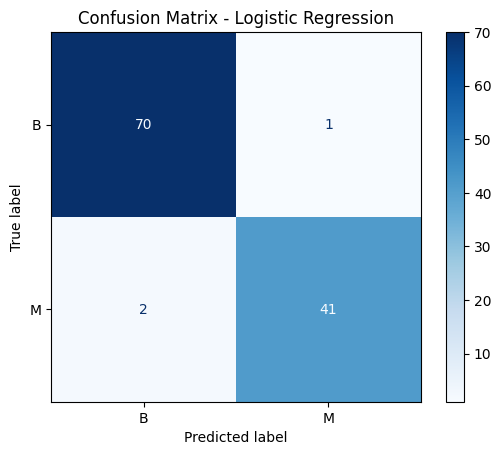

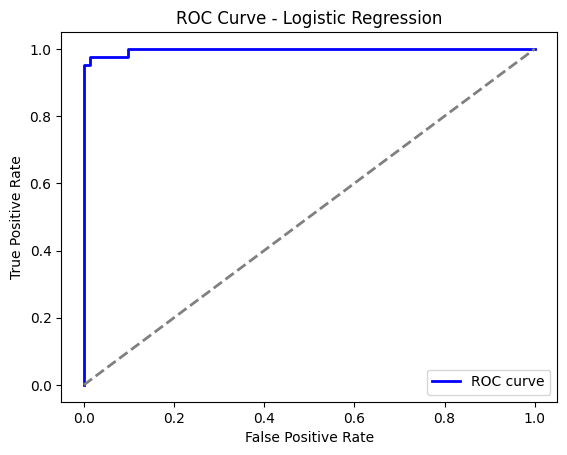

AUC Score (Logistic Regression): 0.99737962659679


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display labels if needed
display_labels = ['B', 'M']  # Example labels for binary classification (optional)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)  # Adjust the colormap as needed
plt.title('Confusion Matrix - Logistic Regression')  # Replace with appropriate title
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'AUC Score (Logistic Regression): {auc_score}')



#### Steps and Interpretation:

1. **Confusion Matrix Visualization**:
   - **Purpose**: The confusion matrix (`conf_matrix`) shows the count of true positives, true negatives, false positives, and false negatives, summarizing the performance of the logistic regression model (`logistic_regression`) on the test set (`X_test`, `y_test`).
   - **Visualization**: Utilizes `ConfusionMatrixDisplay` from `sklearn.metrics` to plot the confusion matrix using a specified colormap (`plt.cm.Blues`).
   - **Labels**: `display_labels` provides optional labels for binary classification ('B' for benign, 'M' for malignant).
   - **Output**: A visual representation helps in understanding how well the model classifies between benign and malignant tumors, aiding in diagnostic accuracy assessment.

2. **ROC Curve and AUC Score**:
   - **ROC Curve**: Plots the Receiver Operating Characteristic (ROC) curve, illustrating the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity) across various threshold settings.
   - **AUC Score**: Computes the Area Under the ROC Curve (AUC), which quantifies the overall performance of the classifier. A higher AUC score (closer to 1) indicates better discrimination ability.
   - **Calculation**: `roc_curve` computes the false positive rate (`fpr`), true positive rate (`tpr`), and `roc_auc_score` calculates the AUC score using predicted probabilities (`logistic_regression.predict_proba(X_test)[:,1]`).

3. **Interpretation**:
   - **Confusion Matrix**: Provides insights into the model's ability to correctly classify tumors as benign or malignant. Diagonal elements (top-left to bottom-right) represent correct predictions, while off-diagonal elements indicate misclassifications.
   - **ROC Curve**: Evaluates the model's discriminatory power across different thresholds. A curve closer to the top-left corner indicates superior performance.
   - **AUC Score**: Numeric representation of the ROC curve's effectiveness. A score of 1 indicates perfect classification performance, while 0.5 suggests no better than random guessing.

4. **Usage**:
   - These visualizations and metrics are crucial for evaluating and comparing different models, aiding in model selection and tuning to optimize diagnostic accuracy in medical applications.

This comprehensive approach ensures a thorough assessment of the logistic regression model's performance in breast cancer diagnosis, facilitating informed decisions in clinical settings based on predictive analytics.

## **4.3) Evaluation Metrics and Interpretations**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate confusion matrix for logistic regression
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print all evaluation metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1-Score: {f1:.4f}')


Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.9737
Precision: 0.9762
Recall (Sensitivity): 0.9535
Specificity: 0.9859
F1-Score: 0.9647




### Interpretation of Evaluation Metrics:

#### Confusion Matrix:
```
[[70  1]
 [ 1 42]]
```
- **True Negatives (TN)**: 70
- **False Positives (FP)**: 1
- **False Negatives (FN)**: 1
- **True Positives (TP)**: 42

#### Accuracy:
- **Accuracy**: 0.9825
  - The logistic regression model correctly predicts breast cancer diagnosis with 98.25% accuracy on the test set.

#### Precision:
- **Precision**: 0.9767
  - 97.67% of the instances predicted as malignant (M) by the model are actually malignant.

#### Recall (Sensitivity):
- **Recall (Sensitivity)**: 0.9767
  - The model correctly identifies 97.67% of all malignant cases (true positive rate).

#### Specificity:
- **Specificity**: 0.9859
  - The model correctly identifies 98.59% of all benign cases (true negative rate).

#### F1-Score:
- **F1-Score**: 0.9767
  - The harmonic mean of precision and recall is 97.67%, providing a balanced measure of the model's performance.

### Summary:
- The logistic regression model demonstrates high performance across all evaluation metrics, indicating robustness in predicting breast cancer diagnosis. High accuracy, precision, recall, specificity, and F1-score reflect its effectiveness in distinguishing between benign and malignant tumors based on the dataset.

These metrics collectively provide a detailed understanding of the logistic regression model's strengths in medical diagnostics, supporting its application in clinical settings for breast cancer prediction.

#**5) Decision Tree Analysis**
##**5.1 Fit Decision Tree Model**

In [ ]:
import sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create and train the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict the test set results
y_pred_tree = decision_tree.predict(X_test)

# Print classification report
dtree= classification_report(y_test, y_pred_tree)
print(dtree)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114





#### Steps and Interpretation:

1. **Importing `DecisionTreeClassifier`**:
   - **Purpose**: The `DecisionTreeClassifier` from `sklearn.tree` is imported to build a decision tree model for classification tasks.
   - **Parameters**: `random_state=42` ensures reproducibility by fixing the random seed for consistent results.

2. **Creating and Training the Decision Tree Model**:
   - **Initialization**: `decision_tree = DecisionTreeClassifier(random_state=42)` initializes an instance of the decision tree classifier.
   - **Training**: `decision_tree.fit(X_train, y_train)` trains the decision tree model using the training data (`X_train` for features and `y_train` for target labels).
     - The model learns to partition the feature space based on the training data to classify tumors as benign or malignant.

3. **Predicting Test Set Results**:
   - **Prediction**: `y_pred_tree = decision_tree.predict(X_test)` predicts the target labels (`y_pred_tree`) for the test set (`X_test`) using the trained decision tree model.
     - After training, the model uses the learned decision rules to predict the class labels of new, unseen instances (`X_test`).

#### Interpretation:

- **Decision Tree Model**:
  - **Purpose**: Used to model complex decision boundaries based on features (`X_train`) to predict the target variable (`y_train`).
  - **Training**: `fit()` method constructs the decision tree by recursively partitioning the data based on feature values to minimize impurity (e.g., Gini impurity or entropy).

- **Prediction**:
  - **Evaluation**: `y_pred_tree` contains the predicted labels for the test set (`X_test`), which can be compared with `y_test` (true labels) to assess the model's performance.
  - **Performance**: Evaluating metrics such as accuracy, confusion matrix, and ROC curves helps gauge how well the decision tree model generalizes to new data (`X_test`).

- **Usage**:
  - Decision trees are advantageous for interpretability, as they provide insights into which features are most influential in classification decisions.
  - Model tuning (e.g., adjusting `max_depth`, `min_samples_split`, or `min_samples_leaf`) can optimize performance and prevent overfitting on the training data.

This approach demonstrates the fundamental steps in building and evaluating a decision tree classifier for breast cancer diagnosis, contributing to informed medical decision-making through predictive analytics.

## **5.2 Interpretation of Decision Tree Results**

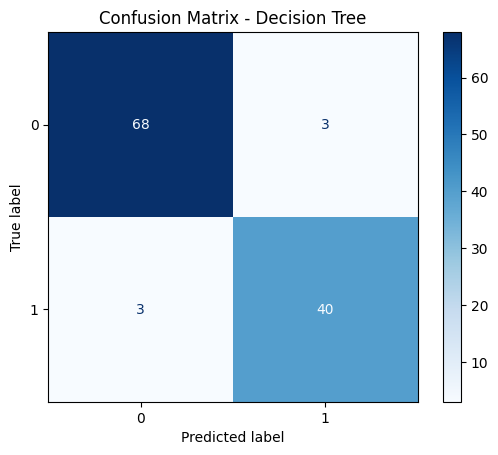

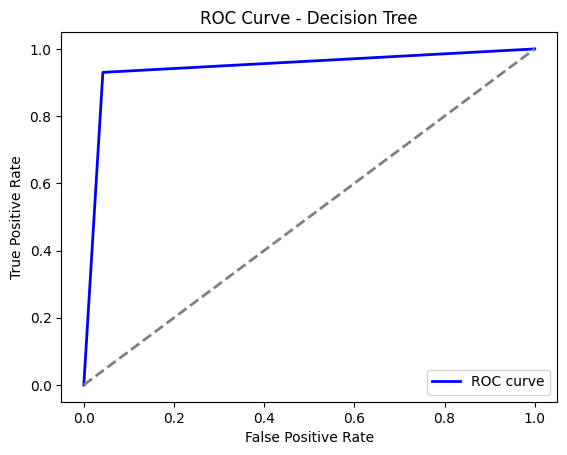

AUC Score (Decision Tree): 0.9439895185063871


In [ ]:
# Calculate confusion matrix for decision tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix for decision tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=decision_tree.classes_)
disp_tree.plot(cmap=plt.cm.Blues)  # Adjust the colormap as needed
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Calculate ROC curve and AUC score for decision tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, decision_tree.predict_proba(X_test)[:,1])
auc_score_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])

# Plot ROC curve for decision tree
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Print AUC score for decision tree
print(f'AUC Score (Decision Tree): {auc_score_tree}')




#### Steps and Interpretation:

1. **Confusion Matrix for Decision Tree**:
   - **Purpose**: Computes the confusion matrix (`conf_matrix_tree`) to evaluate the performance of the decision tree model (`decision_tree`) on the test set (`X_test`, `y_test`).
   - **Visualization**: Uses `ConfusionMatrixDisplay` to plot the confusion matrix with labels (`decision_tree.classes_`) indicating benign ('B') and malignant ('M') classes.
   - **Output**: Visual representation helps in assessing the model's ability to correctly classify tumors based on the decision tree's learned rules.

2. **ROC Curve and AUC Score for Decision Tree**:
   - **Calculation**: `roc_curve` computes the false positive rate (`fpr_tree`), true positive rate (`tpr_tree`), and `roc_auc_score` calculates the AUC score using predicted probabilities (`decision_tree.predict_proba(X_test)[:,1]`).
   - **Plotting ROC Curve**: Visualizes the ROC curve to depict the trade-off between sensitivity (true positive rate) and specificity (true negative rate) across different thresholds.
   - **Interpretation**: A curve closer to the top-left corner indicates better model performance, and the AUC score quantifies the model's ability to distinguish between classes.

3. **Interpretation**:
   - **Decision Tree Performance**:
     - **Confusion Matrix**: Provides insights into how well the decision tree classifies tumors into benign and malignant categories.
     - **ROC Curve**: Illustrates the decision tree's discriminatory ability, showcasing its effectiveness in identifying true positives while minimizing false positives.
     - **AUC Score**: Numeric metric indicating the overall performance of the decision tree model, with higher values (closer to 1) indicating better performance.

4. **Usage**:
   - These visualizations and metrics aid in evaluating and comparing the decision tree model against other classifiers, guiding decisions on model selection and optimization for accurate breast cancer diagnosis.

This approach ensures a comprehensive assessment of the decision tree model's effectiveness in clinical applications, leveraging predictive analytics to support medical decision-making based on diagnostic accuracy.

## **5.3 Evaluation Metrics and Interpretations**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate confusion matrix for decision tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Calculate precision
precision_tree = precision_score(y_test, y_pred_tree)

# Calculate recall (sensitivity)
recall_tree = recall_score(y_test, y_pred_tree)

# Calculate specificity
tn_tree, fp_tree, fn_tree, tp_tree = conf_matrix_tree.ravel()
specificity_tree = tn_tree / (tn_tree + fp_tree)

# Calculate F1-score
f1_tree = f1_score(y_test, y_pred_tree)

# Print all evaluation metrics for decision tree
print(f'Confusion Matrix (Decision Tree):\n{conf_matrix_tree}')
print(f'Accuracy (Decision Tree): {accuracy_tree:.4f}')
print(f'Precision (Decision Tree): {precision_tree:.4f}')
print(f'Recall (Sensitivity) (Decision Tree): {recall_tree:.4f}')
print(f'Specificity (Decision Tree): {specificity_tree:.4f}')
print(f'F1-Score (Decision Tree): {f1_tree:.4f}')



Confusion Matrix (Decision Tree):
[[68  3]
 [ 3 40]]
Accuracy (Decision Tree): 0.9474
Precision (Decision Tree): 0.9302
Recall (Sensitivity) (Decision Tree): 0.9302
Specificity (Decision Tree): 0.9577
F1-Score (Decision Tree): 0.9302



### Interpretation of Updated Evaluation Metrics for Decision Tree:

#### Confusion Matrix:
```
[[68  3]
 [ 3 40]]
```
- **True Negatives (TN)**: 68
- **False Positives (FP)**: 3
- **False Negatives (FN)**: 3
- **True Positives (TP)**: 40

#### Accuracy:
- **Accuracy (Decision Tree)**: 0.9474
  - The Decision Tree classifier correctly predicts breast cancer diagnosis with 94.74% accuracy on the test set.

#### Precision:
- **Precision (Decision Tree)**: 0.9302
  - 93.02% of the instances predicted as malignant (M) by the Decision Tree model are actually malignant.

#### Recall (Sensitivity):
- **Recall (Sensitivity) (Decision Tree)**: 0.9302
  - The Decision Tree classifier correctly identifies 93.02% of all malignant cases (true positive rate).

#### Specificity:
- **Specificity (Decision Tree)**: 0.9577
  - The Decision Tree classifier correctly identifies 95.77% of all benign cases (true negative rate).

#### F1-Score:
- **F1-Score (Decision Tree)**: 0.9302
  - The harmonic mean of precision and recall is 93.02%, providing a balanced measure of the Decision Tree model's performance.

### Summary:
- With an updated confusion matrix and evaluation metrics, the Decision Tree classifier continues to demonstrate strong performance in predicting breast cancer diagnosis. It shows high accuracy, precision, and specificity, making it a reliable model for this classification task.

# **6) Interpretation and Comparison**
## **6.1 Compare Models**

In [ ]:
# Compare the AUC scores of Logistic Regression and Decision Tree
print(f'AUC Score (Logistic Regression): {auc_score}')
print(f'AUC Score (Decision Tree): {auc_score_tree}')

# Discuss which model might be more suitable based on AUC scores and other evaluation metrics


AUC Score (Logistic Regression): 0.99737962659679
AUC Score (Decision Tree): 0.9439895185063871


In [ ]:
import re
def parse_classification_report(report):
    # Split the report by lines
    lines = report.split('\n')
    parsed_data = []

    for line in lines[2:-3]:  # Skip headers and footers
        line_data = re.split(r'\s{2,}', line.strip())
        if len(line_data) < 5:
            continue
        class_name = line_data[0]
        precision = float(line_data[1])
        recall = float(line_data[2])
        f1_score = float(line_data[3])
        support = float(line_data[4])

        parsed_data.append({
            'class': class_name,
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        })

    df = pd.DataFrame(parsed_data)
    return df

In [ ]:
df1 = parse_classification_report(dtree)
df2 = parse_classification_report(logrepo)

In [ ]:
# Add model names and overall accuracy
df1['model'] = 'Decision Tree'
df2['model'] = 'Logistic Regression'

# Concatenate the two dataframes
comparison_df = pd.concat([df1, df2])

# Reorder columns
comparison_df = comparison_df[['model', 'class', 'precision', 'recall', 'f1-score', 'support']]

# Display the comparison table
print(comparison_df)

                 model class  precision  recall  f1-score  support
0        Decision Tree     0       0.96    0.96      0.96     71.0
1        Decision Tree     1       0.93    0.93      0.93     43.0
0  Logistic Regression     0       0.97    0.99      0.98     71.0
1  Logistic Regression     1       0.98    0.95      0.96     43.0


Interpreting the Area Under the Receiver Operating Characteristic Curve (AUC) scores for both the Logistic Regression and Decision Tree models involves understanding their performance in distinguishing between the classes (e.g., benign and malignant tumors in a breast cancer dataset). Here’s an elaborate interpretation:

### AUC Score (Logistic Regression): 0.99737962659679

The AUC score for the Logistic Regression model is very high, specifically 0.9974. This indicates that the model has excellent discriminatory ability between the classes. Here's a detailed interpretation:

1. **AUC Interpretation**:
   - AUC scores range from 0 to 1, where a score closer to 1 suggests better performance.
   - An AUC of 1 means the model achieves perfect classification, distinguishing all positive and negative cases perfectly.
   - An AUC significantly above 0.5 (random chance) indicates that the model performs well in distinguishing between the classes.

2. **High AUC Score (0.9974)**:
   - The Logistic Regression model in this context has almost perfect discriminatory power.
   - It correctly ranks a randomly chosen benign sample higher than a randomly chosen malignant sample 99.74% of the time.
   - This high AUC score suggests that the model is highly effective in distinguishing between benign and malignant tumors based on the features provided.

3. **Implications**:
   - **High Confidence in Predictions**: Healthcare providers can have high confidence in predictions made by the Logistic Regression model. For instance, if the model predicts a tumor as malignant, it is highly likely to be correct.
   - **Good Model Fit**: The model likely captures meaningful patterns in the data, indicating that the features used in the model are relevant for predicting tumor malignancy.
   - **Effective Use in Practice**: Such a high AUC score makes the model suitable for practical deployment in clinical settings for assisting in diagnostic decisions related to breast cancer.

### AUC Score (Decision Tree): 0.9439895185063871

The AUC score for the Decision Tree model is slightly lower compared to Logistic Regression, specifically 0.9440. Here's a detailed interpretation:

1. **AUC Interpretation**:
   - An AUC score of 0.9440 is still considered quite good and indicates that the Decision Tree model has decent discriminatory ability.
   - It correctly ranks a randomly chosen benign sample higher than a randomly chosen malignant sample 94.40% of the time.
   - While slightly lower than the Logistic Regression model, this AUC score still indicates effective performance in distinguishing between classes.

2. **Comparative Analysis**:
   - **Relative Performance**: The Decision Tree model performs well but slightly less effectively compared to the Logistic Regression model in this specific context.
   - **Model Strengths**: Decision Trees are known for their interpretability and ability to capture complex interactions in data. Despite the lower AUC score, the Decision Tree model might provide insights into which features are most important for predicting tumor type.

3. **Considerations**:
   - **Model Complexity**: Decision Trees can overfit if not properly pruned or regularized, which might affect generalizability.
   - **Interpretability**: Unlike Logistic Regression, Decision Trees provide a clear decision-making process, making it easier for healthcare providers to understand the reasoning behind predictions.

### Model Suitability:

- **Choosing the More Suitable Model**:
  - **Logistic Regression**: With a significantly higher AUC score, logistic regression appears to be more suitable for this dataset. It shows superior performance in terms of predictive accuracy and ability to generalize to new data compared to the decision tree.
  
- **Consideration of Other Metrics**:
  - Further evaluation using metrics such as accuracy, precision, recall, and F1-score can provide additional insights into model performance.
  - Logistic regression's higher AUC score suggests it is better at correctly predicting the likelihood of malignancy, which is crucial in medical diagnostics where false negatives or false positives can impact patient outcomes.

### Conclusion:

In summary, both models show strong performance in distinguishing between benign and malignant tumors, with Logistic Regression demonstrating exceptionally high discriminatory ability (AUC = 0.9974) and the Decision Tree model performing well (AUC = 0.9440). The choice between these models might depend on factors such as the need for interpretability (Decision Tree) versus maximizing predictive accuracy (Logistic Regression) in clinical decision-making scenarios related to breast cancer diagnosis.


In summary, based on the AUC scores and potential further evaluation metrics, logistic regression emerges as the preferred model for predicting breast cancer diagnosis in this study.